In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
print(tf.__version__)
# 2.6.0
# Create a list with the filepaths for training and testing


from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model


2.15.0


In [ ]:
from glob import glob

In [ ]:
train_dir = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/*'
train_filepaths = list(glob(train_dir+'/*'))
train_filepaths


['/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1209).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1216).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (121).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1219).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1217).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1210).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (123).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1220).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/Strawberry/Strawberry (1213).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/trai

In [ ]:
test_dir = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/*'
test_filepaths = list(glob(test_dir+'/*'))
test_filepaths

['/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (768).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (314).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (1287).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (1718).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (1415).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (540).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (58).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (900).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (566).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (906).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango

In [ ]:
val_dir = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/*'
val_filepaths = list(glob(val_dir+'/*'))
val_filepaths

['/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1119).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1017).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1272).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1102).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1031).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1179).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1163).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1035).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1054).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classification/valid/Mango/Mango (1579).jpeg',
 '/content/drive/MyDrive/fruits_dataset/Fruits Classificatio

In [ ]:
def image_processing(filepath):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)

    return df


In [ ]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)


In [ ]:
train_df

,Filepath,Label
0,/content/drive/MyDrive/fruits_dataset/Fruits C...,Banana
1,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
2,/content/drive/MyDrive/fruits_dataset/Fruits C...,Strawberry
3,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
4,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
...,...,...
5220,/content/drive/MyDrive/fruits_dataset/Fruits C...,Grape
5221,/content/drive/MyDrive/fruits_dataset/Fruits C...,Grape
5222,/content/drive/MyDrive/fruits_dataset/Fruits C...,Banana
5223,/content/drive/MyDrive/fruits_dataset/Fruits C...,Grape


In [ ]:
print('-- Training set --\n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

-- Training set --

Number of pictures: 5225

Number of different labels: 8

Labels: ['Banana' 'orange fruit' 'Strawberry' 'Mango' 'Grape' 'kiwi fruit' 'Apple'
 'chickoo fruit']


In [ ]:
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/fruits_dataset/Fruits C...,Banana
1,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
2,/content/drive/MyDrive/fruits_dataset/Fruits C...,Strawberry
3,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
4,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit


In [ ]:
# Create a DataFrame with one Label of each category
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()
df_unique

,index,Filepath,Label
0,0,/content/drive/MyDrive/fruits_dataset/Fruits C...,Banana
1,1,/content/drive/MyDrive/fruits_dataset/Fruits C...,orange fruit
2,2,/content/drive/MyDrive/fruits_dataset/Fruits C...,Strawberry
3,6,/content/drive/MyDrive/fruits_dataset/Fruits C...,Mango
4,7,/content/drive/MyDrive/fruits_dataset/Fruits C...,Grape
5,9,/content/drive/MyDrive/fruits_dataset/Fruits C...,kiwi fruit
6,10,/content/drive/MyDrive/fruits_dataset/Fruits C...,Apple
7,11,/content/drive/MyDrive/fruits_dataset/Fruits C...,chickoo fruit


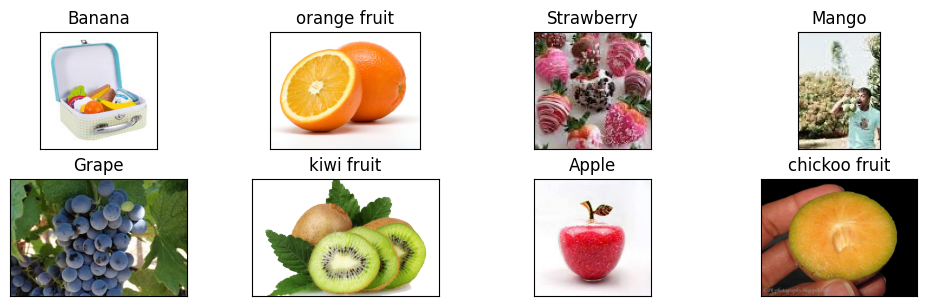

In [ ]:
# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,3),
                        subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 5225 validated image filenames belonging to 8 classes.


In [ ]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 320 validated image filenames belonging to 8 classes.


In [ ]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 160 validated image filenames belonging to 8 classes.


mobielnet


In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(8, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5
164/164 [==============================] - 2643s 16s/step - loss: 0.4245 - accuracy: 0.8542 - val_loss: 0.3260 - val_accuracy: 0.8813
Epoch 2/5
164/164 [==============================] - 63s 388ms/step - loss: 0.1797 - accuracy: 0.9353 - val_loss: 0.3380 - val_accuracy: 0.8813
Epoch 3/5
164/164 [==============================] - 66s 405ms/step - loss: 0.1059 - accuracy: 0.9633 - val_loss: 0.2930 - val_accuracy: 0.9094
Epoch 4/5
164/164 [==============================] - 64s 387ms/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.3277 - val_accuracy: 0.9031
Epoch 5/5
164/164 [==============================] - 64s 390ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.3176 - val_accuracy: 0.8938


In [ ]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)
# # Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1



5/5 [==============================] - 2s 446ms/step


['kiwi fruit',
 'Strawberry',
 'kiwi fruit',
 'Grape',
 'Grape',
 'Strawberry',
 'Mango',
 'Grape',
 'Apple',
 'orange fruit',
 'chickoo fruit',
 'Apple',
 'Apple',
 'chickoo fruit',
 'Banana',
 'Apple',
 'Apple',
 'Grape',
 'Grape',
 'Strawberry',
 'chickoo fruit',
 'Mango',
 'Strawberry',
 'Grape',
 'Strawberry',
 'Grape',
 'Mango',
 'Banana',
 'Apple',
 'chickoo fruit',
 'chickoo fruit',
 'Mango',
 'Apple',
 'kiwi fruit',
 'kiwi fruit',
 'Apple',
 'orange fruit',
 'kiwi fruit',
 'Strawberry',
 'Banana',
 'orange fruit',
 'orange fruit',
 'Strawberry',
 'Apple',
 'chickoo fruit',
 'Grape',
 'Grape',
 'Apple',
 'orange fruit',
 'Banana',
 'Grape',
 'Banana',
 'Banana',
 'Mango',
 'Apple',
 'chickoo fruit',
 'Grape',
 'Apple',
 'Banana',
 'Mango',
 'Mango',
 'kiwi fruit',
 'orange fruit',
 'Banana',
 'Banana',
 'kiwi fruit',
 'Banana',
 'Grape',
 'Apple',
 'kiwi fruit',
 'Strawberry',
 'Grape',
 'orange fruit',
 'orange fruit',
 'chickoo fruit',
 'orange fruit',
 'orange fruit',
 'Grap

In [ ]:
labels

{0: 'Apple',
 1: 'Banana',
 2: 'Grape',
 3: 'Mango',
 4: 'Strawberry',
 5: 'chickoo fruit',
 6: 'kiwi fruit',
 7: 'orange fruit'}

In [ ]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res


In [ ]:
img = output('/content/drive/MyDrive/fruits/images/grapes fruit/Image_1.jpg')
img

1/1 [==============================] - 0s 25ms/step


'Grape'

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
# model = tf.keras.models.load_model('/content/fruits8.h5')

In [ ]:
model.save('fruits8.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('/content/fruits8.h5')

def preprocess_image(image_path):
    # Load and preprocess a single image
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Define your class labels
labels = {0: 'Apple',
 1: 'Banana',
 2: 'Grape',
 3: 'Mango',
 4: 'Strawberry',
 5: 'chickoo fruit',
 6: 'kiwi fruit',
 7: 'orange fruit'}
# Path to your single test image
test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Apple/Apple (1133).jpeg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Banana/Banana (2044).jpeg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Grape/Grape (1073).jpeg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Mango/Mango (275).jpeg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/Strawberry/Strawberry (122).jpeg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/train/chickoo fruit/Image_1 - Copy (12).jpg'
test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/chickoo fruit/Image_14.jpg'
# test_image_path = '/content/drive/MyDrive/fruits_dataset/Fruits Classification/test/orange fruit/Image_10.jpg'


# Preprocess the single test image
processed_image = preprocess_image(test_image_path)

# Perform prediction on the preprocessed image using the loaded model
predictions = model.predict(processed_image)
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class = labels[predicted_class_index]

print("Predicted Class Label:", predicted_class)


1/1 [==============================] - 1s 782ms/step
Predicted Class Label: chickoo fruit
